In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**Predicting sales from advertising spend using Linear Regression**

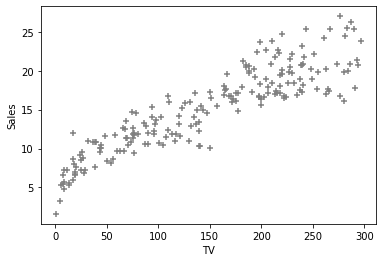

In [ ]:
plt.scatter(advertising.TV, advertising.Sales, \
            marker="+", color='gray')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(advertising[['TV']], advertising[['Sales']])

LinearRegression()

#### Plotting the relationship

In [ ]:
sales_pred = lr.predict(advertising[['TV']])

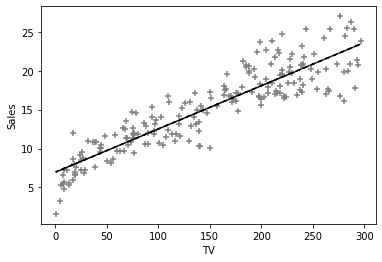

In [ ]:
plt.plot(advertising.TV, sales_pred,"k--")
plt.scatter(advertising.TV, advertising.Sales, \
            marker='+', color='gray')
plt.xlabel("TV")
plt.ylabel('Sales')
plt.show()

In [ ]:
import pandas as pd
import datetime as dt
df = pd.read_csv('azra_retail_transactions.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom


**Creating Features for customer revenue prediction**

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df['revenue'] = df['UnitPrice']*df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom,15.0
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom,7.5
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom,20.4
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom,11.8
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom,16.5


In [ ]:
operations = {'revenue':'sum',\
              'InvoiceDate':'first',\
              'CustomerID':'first'}
df = df.groupby('InvoiceNo').agg(operations)

In [ ]:
df.head()

,revenue,InvoiceDate,CustomerID
InvoiceNo,,,
536365,139.12,2019-12-01 08:26:00,17850.0
536366,22.20,2019-12-01 08:28:00,17850.0
536367,278.73,2019-12-01 08:34:00,13047.0
536368,70.05,2019-12-01 08:34:00,13047.0
536369,17.85,2019-12-01 08:35:00,13047.0


In [ ]:
df['year'] = df['InvoiceDate'].dt.year

In [ ]:
df.head()

,revenue,InvoiceDate,CustomerID,year
InvoiceNo,,,,
536365,139.12,2019-12-01 08:26:00,17850.0,2019
536366,22.20,2019-12-01 08:28:00,17850.0,2019
536367,278.73,2019-12-01 08:34:00,13047.0,2019
536368,70.05,2019-12-01 08:34:00,13047.0,2019
536369,17.85,2019-12-01 08:35:00,13047.0,2019


In [ ]:
df['days_since'] = (dt.datetime(year=2019, month=12, day=31) \
                    - df['InvoiceDate']).apply(lambda x: x.days)

In [ ]:
colors = ['blue', 'pink']

revenue days_since            
                sum        max min nunique
CustomerID                                
12347.0      711.79         23  23       1
12348.0      892.80         14  14       1
12370.0     1868.02         16  13       2
12377.0     1001.52         10  10       1
12383.0      600.72          8   8       1

In [ ]:
X.columns

Index(['revenue_2019', 'days_since_last_purchase', 'number_of_purchases',
       'avg_order_cost'],
      dtype='object')

In [ ]:
X.columns = [' '.join(col).strip() for col in X.columns.values]

In [ ]:
X.columns

Index(['revenue_2019', 'days_since_last_purchase', 'number_of_purchases',
       'avg_order_cost'],
      dtype='object')

In [ ]:
X.head()

,revenue sum,days_since max,days_since min,days_since nunique
CustomerID,,,,
12347.0,711.79,23,23,1
12348.0,892.80,14,14,1
12370.0,1868.02,16,13,2
12377.0,1001.52,10,10,1
12383.0,600.72,8,8,1


In [ ]:
X['avg_order_cost'] = X['revenue sum']/X['days_since nunique']

In [ ]:
X

,revenue sum,days_since max,days_since min,days_since nunique,avg_order_cost
CustomerID,,,,,
12347.0,711.79,23,23,1,711.79
12348.0,892.80,14,14,1,892.80
12370.0,1868.02,16,13,2,934.01
12377.0,1001.52,10,10,1,1001.52
12383.0,600.72,8,8,1,600.72
...,...,...,...,...,...
18239.0,438.10,28,28,1,438.10
18245.0,365.73,11,11,1,365.73
18259.0,376.30,22,22,1,376.30


In [ ]:
agg = {'revenue': 'sum'}

In [ ]:
y = df[df['year'] == 2020].groupby('CustomerID').agg(agg)

KeyError: ignored

In [ ]:
y

CustomerID
12346.0    77183.60
12347.0     3598.21
12348.0      904.44
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: revenue, Length: 4219, dtype: float64

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
wrangled_df = pd.concat([X,y], axis=1)
wrangled_df.columns = ['revenue_2019',\
                       'days_since_first_purchase',\
                       'days_since_last_purchase',\
                       'number_of_purchases',\
                       'avg_order_cost',\
                       'revenue_2020']

wrangled_df.head()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,77183.60
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12349.0,NaN,NaN,NaN,NaN,NaN,1757.55
12350.0,NaN,NaN,NaN,NaN,NaN,334.40


In [ ]:
wrangled_df = wrangled_df[~wrangled_df.revenue_2019.isnull()]
wrangled_df = wrangled_df[~wrangled_df.revenue_2020.isnull()]

In [ ]:
wrangled_df = wrangled_df[wrangled_df.revenue_2020 \
               < ((wrangled_df.revenue_2020.median()) \
               + wrangled_df.revenue_2020.std()*3)]
wrangled_df = wrangled_df[wrangled_df.revenue_2019 \
              < ((wrangled_df.revenue_2019.median()) \
                 + wrangled_df.revenue_2019.std()*3)]

In [ ]:
wrangled_df.to_csv('wrangled_transactions.csv')
wrangled_df.head()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


In [ ]:
df = pd.read_csv('wrangled_transactions.csv', \
                 index_col='CustomerID')

**Examining Relationships between Predictors and Outcome**

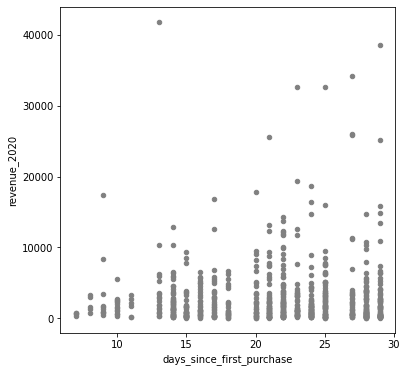

In [ ]:
df.plot.scatter(x="days_since_first_purchase", \
                y="revenue_2020", \
                figsize=[6,6], color='gray')
plt.show()

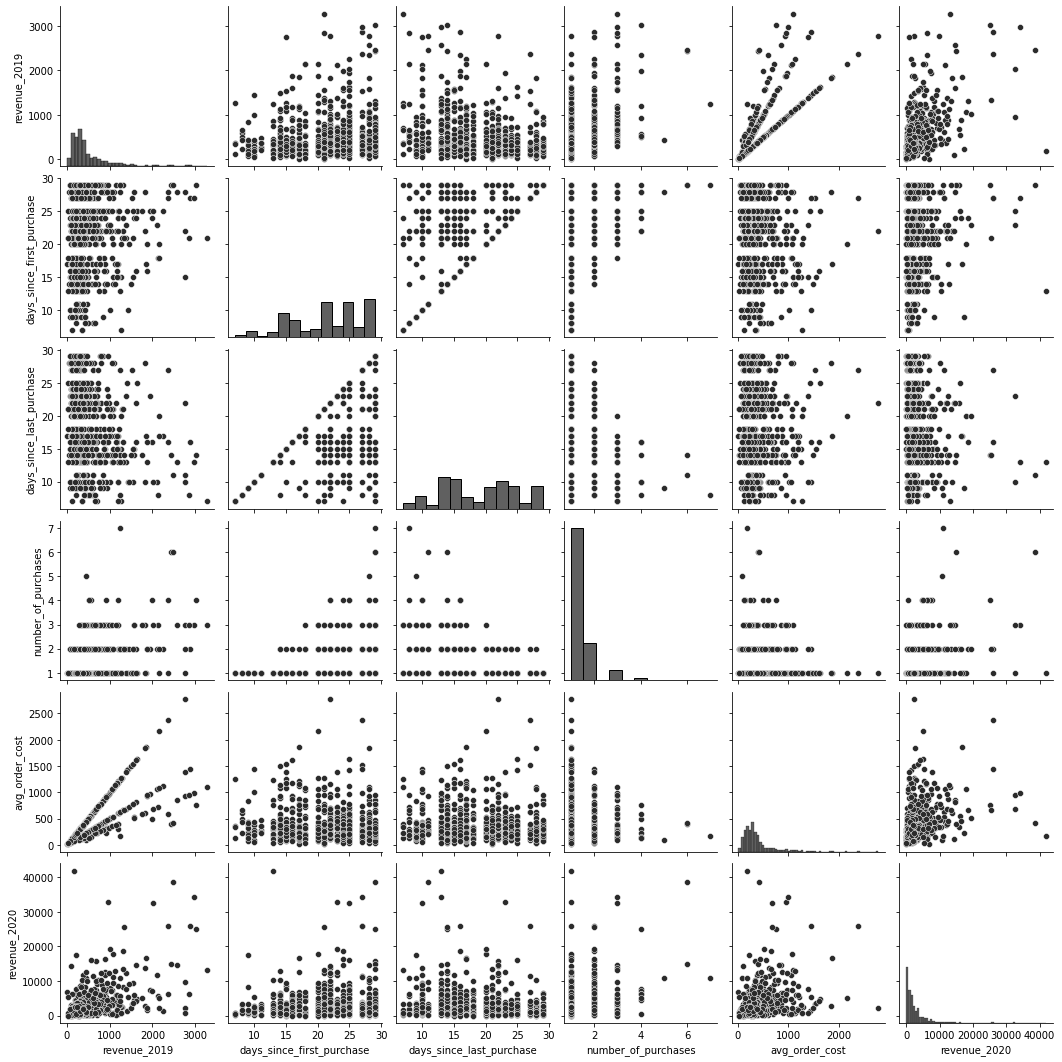

In [ ]:
import seaborn as sns
sns.set_palette('Greys_r')
sns.pairplot(df)
plt.show()

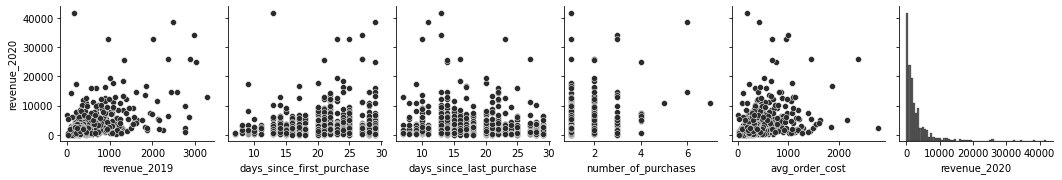

In [ ]:
sns.pairplot(df, x_vars=df.columns, y_vars="revenue_2020")
plt.show()

In [ ]:
df.corr()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2020,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


## Exercise 5.04: Building a Linear Model Predicting Customer Spend

In [ ]:
df = pd.read_csv('wrangled_transactions.csv', \
                 index_col='CustomerID')

In [ ]:
df.corr()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2020,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


In [ ]:
X = df[['revenue_2019',\
        'days_since_last_purchase',\
        'number_of_purchases',\
        'avg_order_cost']]

y = df['revenue_2020']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([  5.78799016,   7.47737544, 336.60769871,  -2.0558923 ])

In [ ]:
model.intercept_

264.8693265705956

In [ ]:
single_customer = pd.DataFrame({
    'revenue_2019': [1000],
    'days_since_last_purchase': [20],
    'number_of_purchases': [2],
    'avg_order_cost': [500]
})

model.predict(single_customer)

array([5847.67624446])

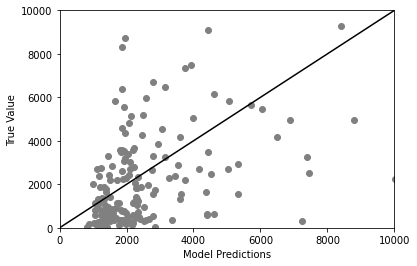

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(X_test), y_test, color='gray')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0, 10000], [0, 10000], 'k-')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

In [ ]:
np.corrcoef(model.predict(X_test), y_test)

array([[1.        , 0.61257401],
       [0.61257401, 1.        ]])